# Random Forest Classification

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rf_classifier import RFClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from scorer import Scorer

## Load data

In [3]:
# cfg
n_train = 50

In [4]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

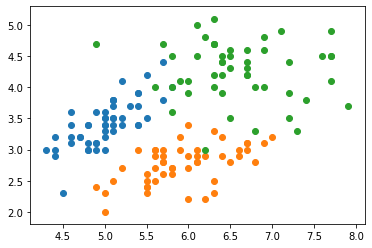

In [6]:
plt.scatter(X[y==0,0], X[y==0,1], label=0)
plt.scatter(X[y==1,0], X[y==1,1], label=1)
plt.scatter(X[y==2,0], X[y==1,2], label=2)

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train model, KF-cv model selection

In [8]:
# build model
clf = RFClassifier(model_selection_score_metric='accuracy')

In [9]:
# train + model selection using k-fold CV
clf.train(X_train, y_train, model_selection_method='KF-CV')

INFO:root:Running Model Selection: KF-CV


In [10]:
clf.get_params()

{'model_name': 'rf',
 'n_estimators': 200,
 'max_depth': 3,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'class_weight': 'balanced_subsample'}

## Evaluate

In [11]:
# predict
y_pred = clf.predict(X_test)

In [12]:
# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

